# Logistic Regression with Tensorflow on MNIST Fashion dataset

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Data ingestion

In [2]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Exploratory Data Analysis

In [3]:
# 1. Printing shapes and types of the training and test sets, and interpreting the numbers

print(f"The shape of X_train is {X_train.shape}") # These numbers represent 60,000 images, each 28x28 pixels
print(f"The type of X_train is {type(X_train)}\n") # This is a numpy array


print(f"The shape of Y_train is {Y_train.shape}") # These numbers represent 60,000 labels
print(f"The type of Y_train is {type(Y_train)}\n") # This is a numpy array


print(f"The shape of X_test is {X_test.shape}") # These numbers represent 10,000 images, each 28x28 pixels
print(f"The type of X_test is {type(X_test)}\n") # This is a numpy array

print(f"The shape of Y_test is {Y_test.shape}") # These numbers represent 10,000 labels
print(f"The type of Y_test is {type(Y_test)}\n") # This is a numpy array

The shape of X_train is (60000, 28, 28)
The type of X_train is <class 'numpy.ndarray'>

The shape of Y_train is (60000,)
The type of Y_train is <class 'numpy.ndarray'>

The shape of X_test is (10000, 28, 28)
The type of X_test is <class 'numpy.ndarray'>

The shape of Y_test is (10000,)
The type of Y_test is <class 'numpy.ndarray'>



In [4]:
# Define a list of strings of class names corresponding to each class in (Y_train, Y_test)

label_names = ['tshirt','trouser','pullover','dress','coat','sandal', 'shirt','sneaker','bag','ankleboot']


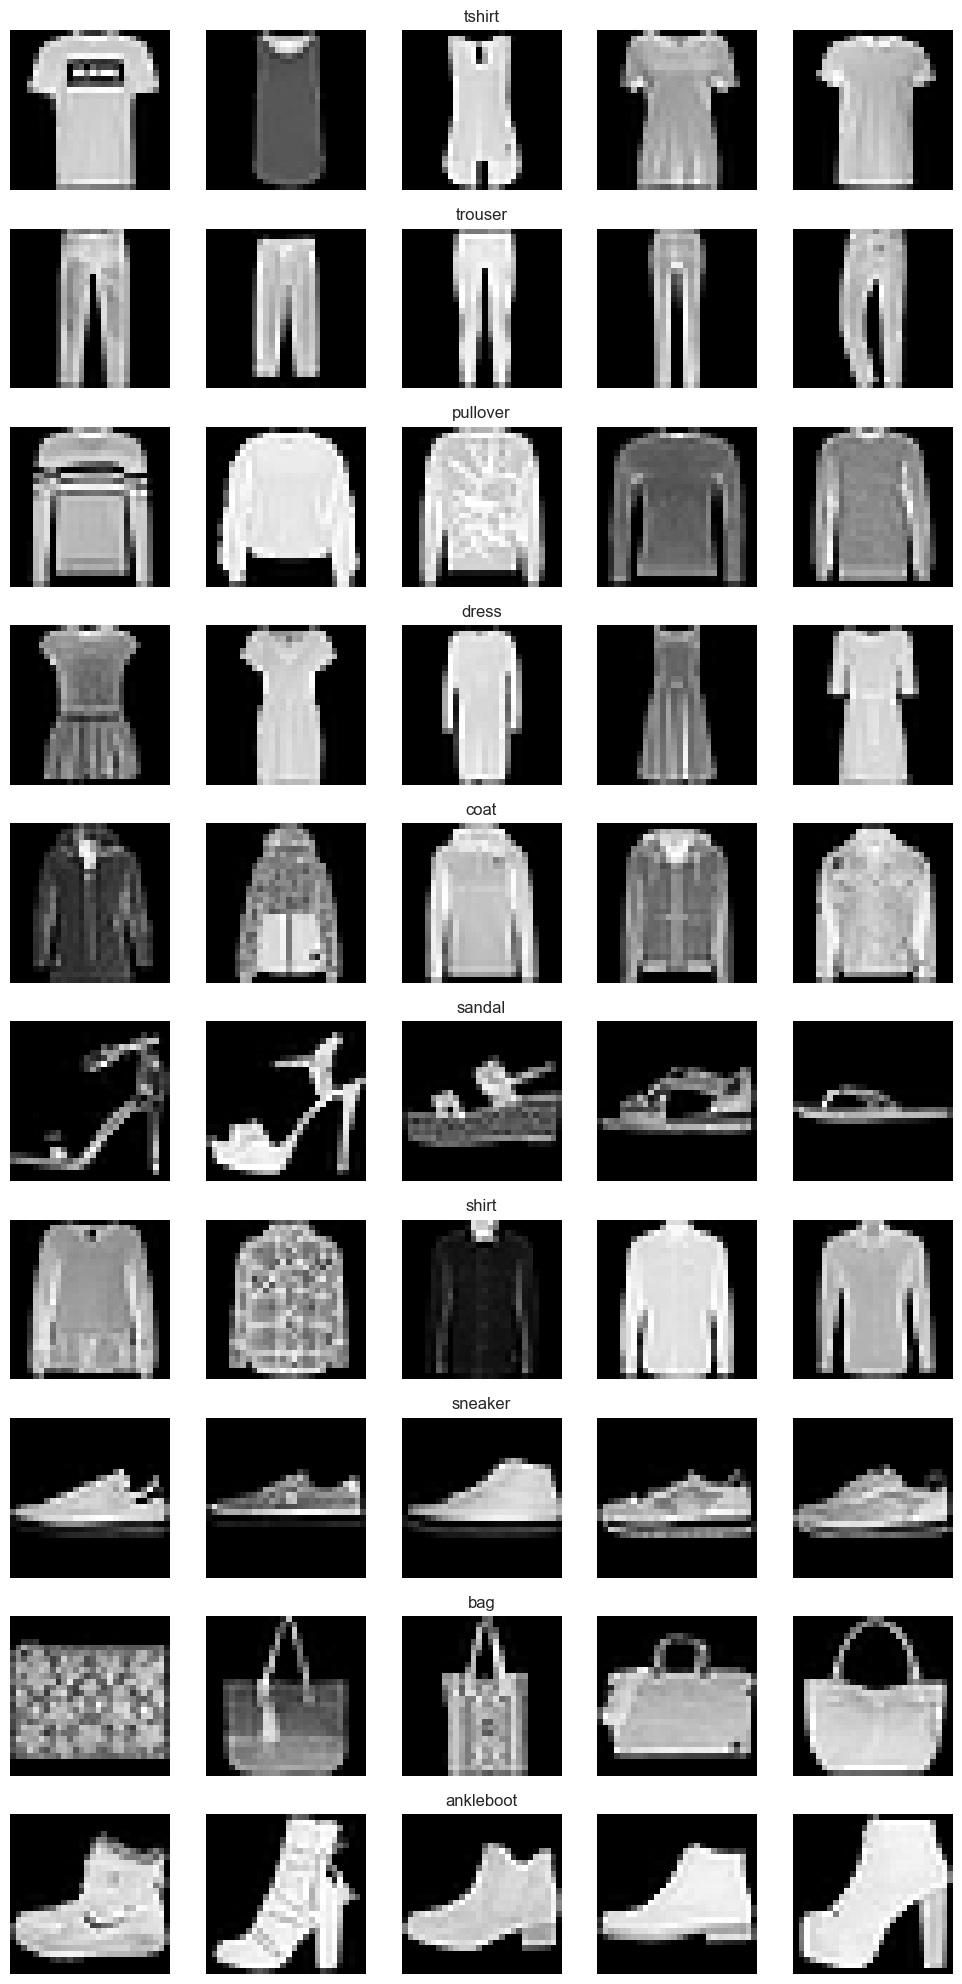

In [5]:
# Initiate plot
fig, ax = plt.subplots(nrows= 10, ncols= 5, figsize = (10,20))

# Find indices for each class
for label in range(10):
    idxs = np.where(Y_train == label)[0][:5]
    
    # Show image for each index
    for i, idx in enumerate(idxs):
        ax[label,i].imshow(X_train[idx],cmap='gray')
        ax[label, i].axis('off')
        if i == 2:  # i = 2 is when the label is centered
            ax[label, i].set_title(label_names[label])

# Show plot
plt.tight_layout()
plt.show()

In [6]:
# Determine the minimum and maximum pixel values in X_train
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_min,X_train_max
# For X_train, the minimum pixel value is 0 and the maximum pixel value is 255

(0, 255)

---
### Data preprocessing

In [7]:
# Use min-max normalization
X_train = (X_train-X_train_min)/(X_train_max-X_train_min)
X_test = (X_test-X_train_min)/(X_train_max-X_train_min)

In [8]:
# Check normalized range
X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [9]:
# Reshape, flattening the 2-D 28x28 pixel array to a 1-D array of size 784
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [10]:
# Print the shape of the arrays 
print(f"The shape of X_train after reshaping is {X_train.shape}")
print(f"The shape of X_test after reshaping is {X_test.shape}")

The shape of X_train after reshaping is (60000, 784)
The shape of X_test after reshaping is (10000, 784)


### Label preprocessing

In [11]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# Replacing positive examples with 1, and negative with 0
Y_train = np.where(Y_train == 7, 1,0)
Y_test = np.where(Y_test== 7, 1,0)

# Checking unique values for both Y_train and Y_test
print(f"Unique values for Y_train: {np.unique(Y_train)}")
print(f"Unique values for Y_test: {np.unique(Y_test)}")
        

Unique values for Y_train: [0 1]
Unique values for Y_test: [0 1]


### Data splits

In [12]:
# Splitting X_train and Y_train to get validation sets
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

# Printing shapes of arrays
print(f"The shape of X_train_mini is {X_train_mini.shape}")
print(f"The shape of X_val is {X_val.shape}")
print(f"The shape of Y_train_mini is {Y_train_mini.shape}")
print(f"The shape of Y_val is {Y_val.shape}")


The shape of X_train_mini is (48000, 784)
The shape of X_val is (12000, 784)
The shape of Y_train_mini is (48000,)
The shape of Y_val is (12000,)


### Data shuffling

In [13]:
np.random.seed(0)

# Create indices that has the number of observations for X_train_mini and Y_train_mini
indices = np.arange(X_train_mini.shape[0])

# Shuffle indices
indices = np.random.permutation(indices)

# Reorder X_train_mini and Y_train_mini according to shuffled indices
X_train_mini = X_train_mini[indices]
Y_train_mini = Y_train_mini[indices]

---
### Exploratory Data Analysis Part 2

### Pixel distributions

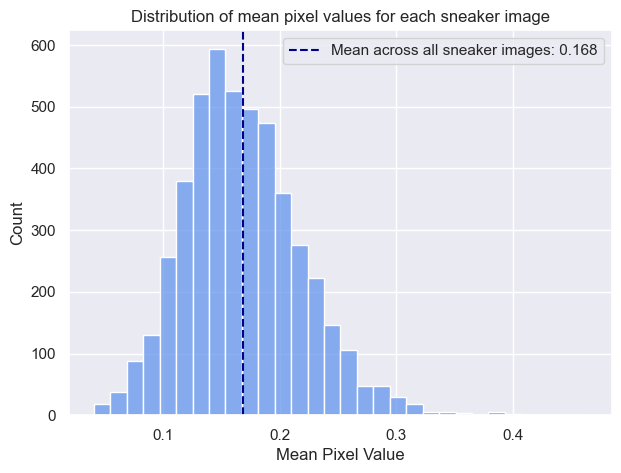

In [14]:
# Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. 

sneaker_means = X_train_mini[np.where(Y_train_mini==1)[0]].mean(axis = 1)

# Visualize these pixel values using a histogram
fig ,ax = plt.subplots(figsize = (7,5))
sns.histplot(sneaker_means, ax = ax, color = "cornflowerblue", bins = 30)
plt.title("Distribution of mean pixel values for each sneaker image")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Count")
plt.axvline(sneaker_means.mean(), color = 'darkblue', linestyle = '--', label = f"Mean across all sneaker images: {sneaker_means.mean():.3f}") #  Print the mean pixel value across all sneaker images
plt.legend()

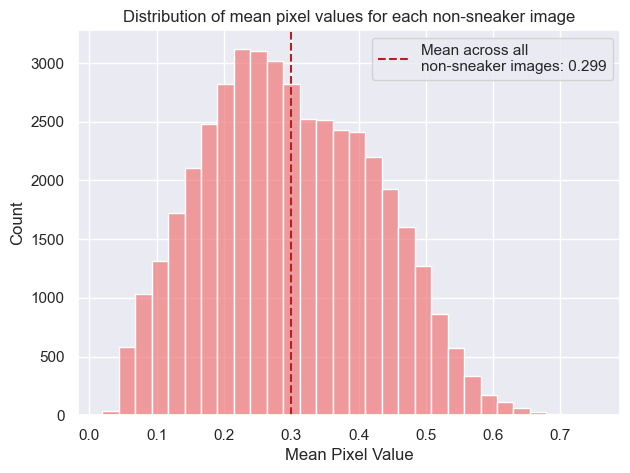

In [15]:
# Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image

non_sneaker_means = X_train_mini[np.where(Y_train_mini==0)[0]].mean(axis = 1)

# Visualize these pixel values using a histogram
fig ,ax = plt.subplots(figsize = (7,5))
sns.histplot(non_sneaker_means, ax = ax, color = "lightcoral", bins = 30)
plt.title("Distribution of mean pixel values for each non-sneaker image")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Count")
plt.axvline(non_sneaker_means.mean(), color = 'firebrick', linestyle = '--', label = f"Mean across all\nnon-sneaker images: {non_sneaker_means.mean():.3f}") #  Print the mean pixel value across all non-sneaker images
plt.legend()

In [16]:
# The histogram results suggest that non-sneaker images are more likely to have higher pixel means. However, there are still many sneaker and non-sneaker images
# in the lowest bin for mean pixel values, and thus just taking pixel values may not be sufficient to distinguish sneaker from non-sneaker images

---
### Modeling

### Baseline model

In [17]:
print(f"1. The number of sneaker images in Y_train_mini is {Y_train_mini[Y_train_mini == 1].shape[0]}")
print(f"2. The number of non-sneaker images in Y_train_mini is {Y_train_mini[Y_train_mini == 0].shape[0]}")
print(f"3. The majority class in Y_train_mini is thus non-sneaker")
print(f"4. The accuracy of a majority class classifier for Y_train_mini would be {Y_train_mini[Y_train_mini == 0].shape[0]/Y_train_mini.shape[0]}") # Accuracy is (TP(0, since we always guess negative) + TN(43200))/Total number of guesses (48000)


1. The number of sneaker images in Y_train_mini is 4800
2. The number of non-sneaker images in Y_train_mini is 43200
3. The majority class in Y_train_mini is thus non-sneaker
4. The accuracy of a majority class classifier for Y_train_mini would be 0.9


In [18]:
# Implement a function that computes the Log Loss (binary cross-entropy) metric
def log_loss(y_true, y_pred):
    loss = -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return loss

In [19]:
print(Y_train_mini.shape)
print(Y_val.shape)

(48000,)
(12000,)


In [20]:
# Evaluting baselines for Y_train_mini and Y_val
Y_train_mini_baseline = log_loss(Y_train_mini, 0.1)
Y_val_baseline = log_loss(Y_val, 0.1)

print(f"The baseline log-loss for Y_train_mini is {Y_train_mini_baseline}")
print(f"The baseline log-loss for Y_val is {Y_val_baseline}")

The baseline log-loss for Y_train_mini is 0.3250829733914482
The baseline log-loss for Y_val is 0.3250829733914482


### Improvement over Baseline with TensorFlow

In [21]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """

  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # want just a single layer for binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=(num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation="sigmoid",
      kernel_initializer=tf.ones_initializer(),  # initialize params to 1
      bias_initializer=tf.ones_initializer(),    # initialize bias to 1
  ))

  # use SGD, which is mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
  return model

In [22]:
tf.random.set_seed(0)
# Build and compile model

model_tf = build_model(num_features = X_train_mini.shape[1], learning_rate = 0.0001)

# Fit the model

num_epochs = 5
batch_size = 32

history = model_tf.fit(X_train_mini, Y_train_mini, epochs = num_epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/5
   1/1500 ━━━━━━━━━━━━━━━━━━━━ 2:20 94ms/step - loss: 198.4385

/Users/jonathanho/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - loss: 208.5961 - val_loss: 199.9825
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 196.0804 - val_loss: 187.4252
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 183.5648 - val_loss: 174.8679
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 171.0492 - val_loss: 162.3107
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 158.5334 - val_loss: 149.7533


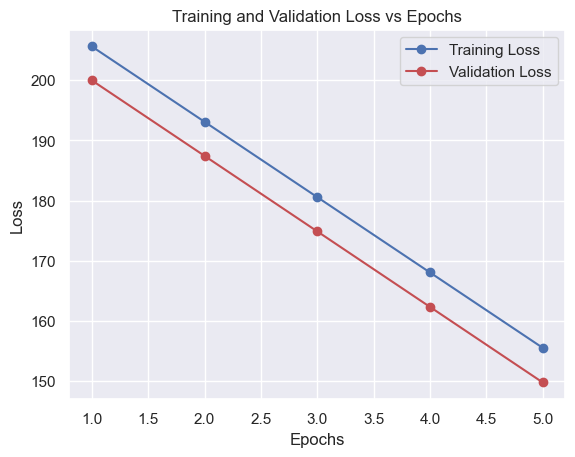

In [23]:
# Get loss values for both training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an epoch range
epochs = range(1, num_epochs + 1)

# Plot training loss and validation loss
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()

# Display the plot
plt.show()

---
### Hyperparameter tuning

In [24]:
import keras_tuner as kt
from keras_tuner import HyperParameters
from keras_tuner import RandomSearch
from keras_tuner import Hyperband

In [25]:
tf.random.set_seed(0)
def build_model_tuner(hp):
    """Build a Keras model for Keras Tuner with hyperparameters.""" 
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=1,                         # Output dimension (binary classification)
        input_shape=(784,),      # Input dimension
        use_bias=True,                    # Include bias (intercept)
        activation="sigmoid",             # Sigmoid for binary logistic regression
        kernel_initializer=tf.ones_initializer(),  # Initialize weights to 1
        bias_initializer=tf.ones_initializer()     # Initialize bias to 1
    ))

    # Use the learning rate as a hyperparameter to be tuned
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
    
    # Choose the optimizer (SGD in this case)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Compile the model with binary cross-entropy and accuracy metrics
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


In [26]:
# Set up the RandomSearch tuner to tune the learning rate
tuner = kt.RandomSearch(
    build_model_tuner,                 # Model building function
    objective='val_loss',          # Objective to maximize validation accuracy
    max_trials=10,                      # Number of hyperparameter combinations to try
    directory='my_dir',                # Directory to save results
    project_name='randomsearch_tuning',  # Project name
    overwrite=True
)

# Define EarlyStopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Search for the best hyperparameters (learning rate only)
tuner.search(
    X_train_mini, Y_train_mini, 
    epochs=10, 
    validation_data=(X_val, Y_val), 
    callbacks=[stop_early]
)

# Print the search summary
tuner.results_summary()


Trial 10 Complete [00h 00m 04s]
val_loss: 0.08067671209573746

Best val_loss So Far: 0.050463318824768066
Total elapsed time: 00h 00m 45s
Results summary
Results in my_dir/randomsearch_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 04 summary
Hyperparameters:
learning_rate: 0.0716029050924005
Score: 0.050463318824768066

Trial 00 summary
Hyperparameters:
learning_rate: 0.06493783437679115
Score: 0.05111324414610863

Trial 09 summary
Hyperparameters:
learning_rate: 0.01778399726105578
Score: 0.08067671209573746

Trial 05 summary
Hyperparameters:
learning_rate: 0.015571639043333276
Score: 0.08786628395318985

Trial 02 summary
Hyperparameters:
learning_rate: 0.013542293114324571
Score: 0.096232108771801

Trial 01 summary
Hyperparameters:
learning_rate: 0.0061042815519589295
Score: 0.1710694581270218

Trial 06 summary
Hyperparameters:
learning_rate: 0.004344792077950743
Score: 0.22104616463184357

Trial 03 summary
Hyperparameters:
learning_rate: 0.00062498

In [27]:
# Retrieve the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters()[0]

# Look at best Hyperparameters
best_hp.values

{'learning_rate': 0.0716029050924005}

In [28]:
# Build the best model with these hyperparameters
model_tf = tuner.hypermodel.build(best_hp)
# Train the best model on the full dataset with these hyperparameters
history = model_tf.fit(X_train_mini, Y_train_mini, epochs=50, validation_data=(X_val, Y_val),batch_size = 32)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - accuracy: 0.8117 - loss: 14.1431 - val_accuracy: 0.9537 - val_loss: 0.1528
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9594 - loss: 0.1354 - val_accuracy: 0.9656 - val_loss: 0.0927
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9694 - loss: 0.0902 - val_accuracy: 0.9721 - val_loss: 0.0723
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.9752 - loss: 0.0727 - val_accuracy: 0.9752 - val_loss: 0.0630
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.9784 - loss: 0.0642 - val_accuracy: 0.9767 - val_loss: 0.0581
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.9804 - loss: 0.0593 - val_accuracy: 0.9776 - val_loss: 0.0552
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.9814 - loss: 0.0564 - val_accuracy: 0.9783 - val_loss: 0.0534
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.9820 

In [29]:
# Get the learned parameters (weights and bias) of the tuned model
weights, bias = model_tf.layers[0].get_weights()

# The first five learned parameters of the model, with bias term;

print("Weights:", weights[:5])
print("Bias:", bias)

Weights: [[0.9997644 ]
 [0.99856955]
 [0.9711965 ]
 [0.9490657 ]
 [0.91953754]]
Bias: [-1.953962]


In [30]:
# Get loss at the final epoch for both training and validation datasets
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]

# The loss at the final epoch on both the mini training and validation datasets;
print(f"Final epoch training loss: {final_training_loss}")
print(f"Final epoch validation loss: {final_validation_loss}")

Final epoch training loss: 0.04277830943465233
Final epoch validation loss: 0.04668454825878143


In [31]:
# The percentage difference between the losses observed on the mini training and validation datasets.
loss_difference = (final_training_loss - final_validation_loss)/final_training_loss
print(f"Percentage difference between training and validation loss: {loss_difference}")

Percentage difference between training and validation loss: -0.09131353893487146


In [32]:
# The baseline model loss is 0.3250829733914482, and the training and validation losses of the TensorFlow model (model_tf) are 0.0.04277830943465233 and 0.0.04668454825878143
# respectively, both of which are substantially lower than the baseline, indicating an improvement over the baseline model.

---
### Evaluation and Generalization

### Computing accuracy 

In [33]:
# Evaluate aggregate accuracy on mini training and test datasets
train_loss, train_accuracy = model_tf.evaluate(X_train_mini, Y_train_mini, verbose=2)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

val_loss, val_accuracy = model_tf.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {val_accuracy * 100:.2f}%")

1500/1500 - 0s - 170us/step - accuracy: 0.9852 - loss: 0.0420
Train Accuracy: 98.52%
313/313 - 0s - 328us/step - accuracy: 0.9821 - loss: 0.0478
Test Accuracy: 98.21%


In [34]:
# The model does demonstrate strong aggregate generalization capabilities, as the test accuracy is extremely close to the train accuracy.

### Fairness evaluation 

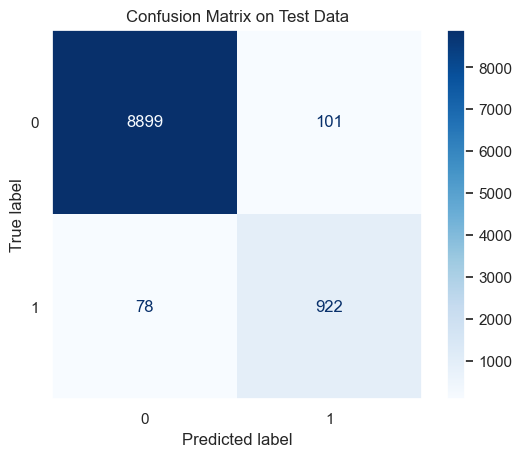

In [35]:
# Predict probabilities
test_preds_probs = model_tf.predict(X_test, verbose = 0)

# Predictions, with threshold of 0.5
test_preds = (test_preds_probs >= 0.5).astype(int)

# Generate and print confusion matrix
cm = confusion_matrix(Y_test,test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.grid(0)
plt.title("Confusion Matrix on Test Data")
plt.show()


In [36]:
# Extract True Positives, False Negatives, False Positives, and True Negatives
TP = cm[1, 1]  # True Positives
FN = cm[1, 0]  # False Negatives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives

print(f"True Positives (TP): {TP}")
print(f"False Negatives (FN): {FN}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")

True Positives (TP): 922
False Negatives (FN): 78
False Positives (FP): 101
True Negatives (TN): 8899


In [37]:
# Accuracy for sub-class sneakers
accuracy_score_sneakers = TP/(TP+FN)
print(f"Sneaker Class Accuracy: {accuracy_score_sneakers * 100:.2f}%")
# Accuracy for sub-class non-sneakers
accuracy_score_non_sneakers = TN/(TN+FP)
print(f"Non-Sneaker Class Accuracy: {accuracy_score_non_sneakers * 100:.2f}%")

Sneaker Class Accuracy: 92.20%
Non-Sneaker Class Accuracy: 98.88%


In [38]:
# Trying out accuracy_score to calculate it 

# Indices for the sneaker (class 1) and non-sneaker (class 0) examples
sneaker_indices = np.where(Y_test == 1)[0]
non_sneaker_indices = np.where(Y_test == 0)[0]

# Subgroup accuracy for the sneaker class (class 1)
sneaker_accuracy = accuracy_score(Y_test[sneaker_indices],test_preds[sneaker_indices])
print(f"Sneaker Class Accuracy: {sneaker_accuracy * 100:.2f}%")

# Subgroup accuracy for the non-sneaker class (class 0)
non_sneaker_accuracy = accuracy_score(Y_test[non_sneaker_indices], test_preds[non_sneaker_indices])
print(f"Non-Sneaker Class Accuracy: {non_sneaker_accuracy * 100:.2f}%")

Sneaker Class Accuracy: 92.20%
Non-Sneaker Class Accuracy: 98.88%


In [39]:
# Calculating difference in subgroup accuracy
accuracy_difference = sneaker_accuracy - non_sneaker_accuracy
print(f"Difference in accuracy (Sneaker - Non-Sneaker): {accuracy_difference * 100:.2f}%")

Difference in accuracy (Sneaker - Non-Sneaker): -6.68%


In [40]:
# The model seems to be more accurate for the Non-sneaker class, when compared to the sneaker class.

# The model does demonstrate strong subgroup generalization capabilities, given that both accuracy scores are still 92% and above. 